# Visualization Design

In this assignment, you will design a visualization for a small data set and provide a rigorous rationale for your design choices. You should, in theory, be ready to explain the contribution of every pixel in the display. You are free to use any graphics or charting tool you please. However, I recommend to used Altair for this assignment. 

## Dataset

After the World War II, antibiotics were considered as "wonder drugs", since they were easy remedy for what had been intractable ailments. To learn which drug worked most effectively for which bacterial infection, performance of the three most popular antibiotics on 16 bacteria were gathered.

In [1]:
# load data
import pandas as pd
data= pd.read_csv('a1-burtin.csv')

data

,Bacteria,Penicilin,Streptomycin,Neomycin,Gram_Staining
0,Aerobacter aerogenes,870.000,1.00,1.600,negative
1,Brucella abortus,1.000,2.00,0.020,negative
2,Brucella anthracis,0.001,0.01,0.007,positive
3,Diplococcus pneumoniae,0.005,11.00,10.000,positive
4,Escherichia coli,100.000,0.40,0.100,negative
5,Klebsiella pneumoniae,850.000,1.20,1.000,negative
6,Mycobacterium tuberculosis,800.000,5.00,2.000,negative
7,Proteus vulgaris,3.000,0.10,0.100,negative
8,Pseudomonas aeruginosa,850.000,2.00,0.400,negative
9,Salmonella (Eberthella) typhosa,1.000,0.40,0.008,negative


The values in the table represent the minimum inhibitory concentration (MIC), a measure of the effectiveness of the antibiotic, which represents the concentration of antibiotic required to prevent growth in vitro. The reaction of the bacteria to Gram staining is described by the covariate “gram staining”. Bacteria that are stained dark blue or violet are Gram-positive. Otherwise, they are Gram-negative.

## Task

Your task is to design a static (i.e., single image) visualization that you believe effectively communicates the data and provide a short write-up (no more than 4 paragraphs) describing your design. While you must use the data set given, note that you are free to transform the data as you see fit. You are also free to incorporate external data as you see fit. Your chart image should be interpretable without recourse to your short write-up. Do not forget to include title, axis labels or legends as needed!

As different visualizations can emphasize different aspects of a data set, you should document what aspects of the data you are attempting to most effectively communicate. In short, what story (or stories) are you trying to tell? Just as important, also note which aspects of the data might be obscured or down-played due to your visualization design.

In your write-up, you should provide a rigorous rationale for your design decisions. Document the visual encodings you used and why they are appropriate for the data. These decisions include the choice of visualization type, size, color, scale, and other visual elements, as well as the use of sorting or other data transformations. How do these decisions facilitate effective communication?

## Some Tentative Results
The following visualizations were created by students in the Data Visualization course (Winter 2014) at University of Washington [link](https://courses.cs.washington.edu/courses/cse512/14wi/a1.html).

<img src="tmp/bar1.png",width=800>
<img src="tmp/bar2.png",width=800>
<img src="tmp/bar3.png",width=800>
<img src="tmp/dot_plot.png",width=800>
<img src="tmp/line_chart.png",width=800>
<img src="tmp/heatmap.png",width=800>

# Follow these steps:

## 1. Analyse the data 
    * What are the data types?
    * Transform the data to 'tidy format'

In [2]:
data2 = pd.melt(data, id_vars=['Bacteria', 'Gram_Staining'], 
                value_vars=['Penicilin', 'Streptomycin', 'Neomycin'], var_name='antibiotic', value_name='MIC')
data2
data2.to_csv('cleaned.csv')

Use the template code below to start your visualization. 

In [3]:
from altair import *

Chart(data2).mark_*().encode()

AttributeError: 'Chart' object has no attribute 'mark_'

## 2. Select a *bar* mark 

In [4]:
from altair import *

Chart(data2).mark_bar().encode()

## 3. Define the following encoding:
  * x: antibiotic
  * y: MIC
  * color: antibiotic
  * column: Bacteria

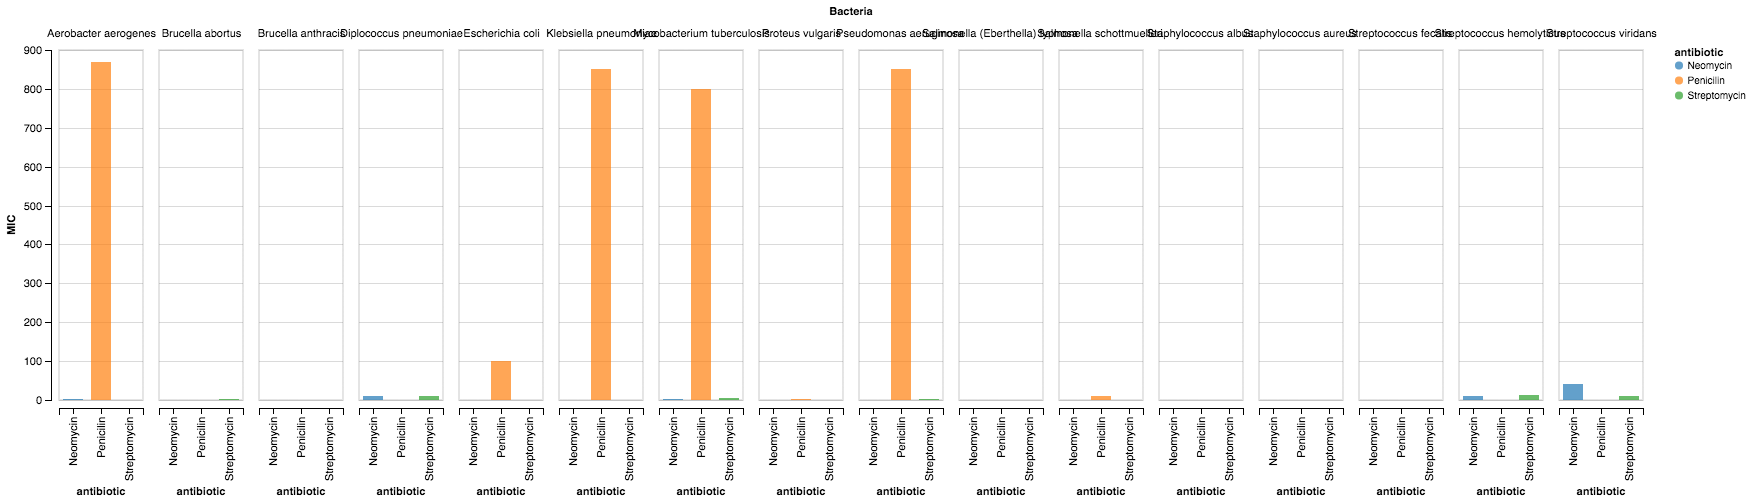

In [5]:
from altair import *

Chart(data2).mark_bar().encode(
    x='antibiotic:N',
    y='MIC:Q',
    color='antibiotic:N',
    column='Bacteria:N'
)

## 4. Use *log* scale for *y*-axis
* y.scale=Scale(type='log')
* y.axis=Axis(title='log(MIC)')

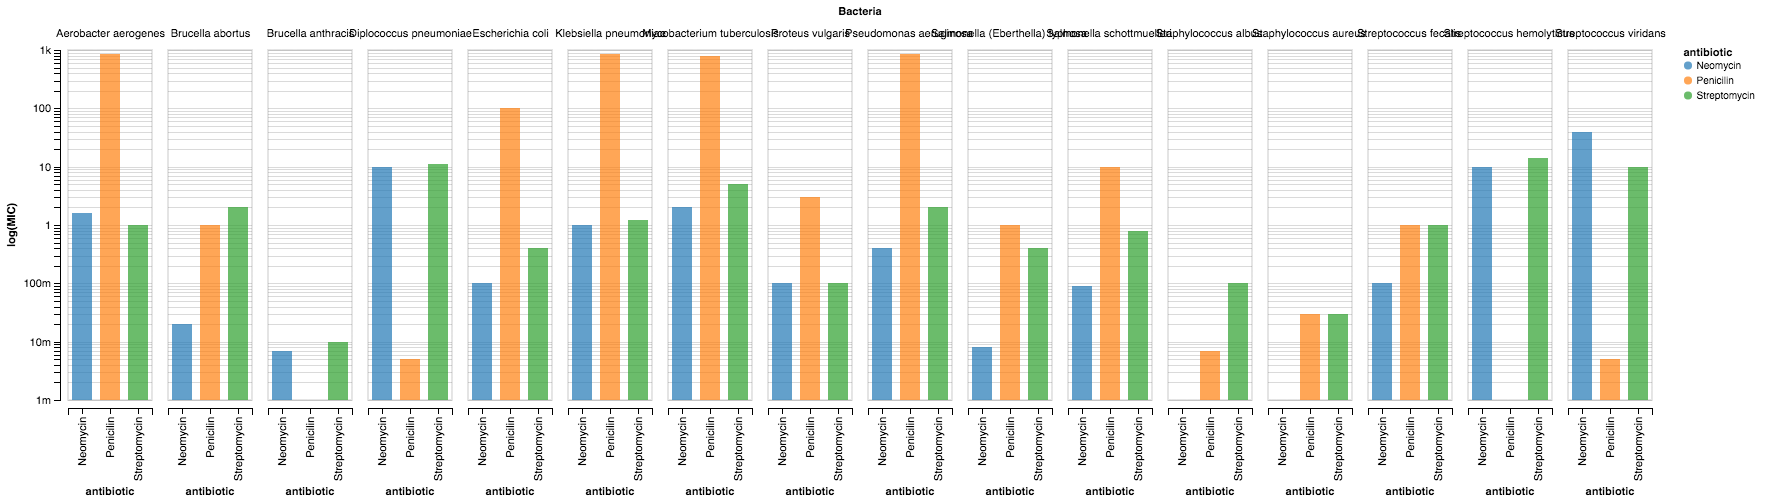

In [6]:
from altair import *

Chart(data2).mark_bar().encode(
    x=X('antibiotic:N'),
    y=Y('MIC:Q', scale=Scale(type='log'), axis=Axis(title='log(MIC)')),
    color=Color('antibiotic:N'),
    column=Column('Bacteria:N')
)

## 5. Adjusting Aesthetics
  * x.scale=Scale(bandSize=6.0)
  * x.axis=False
  * y.axis=Axis(grid=False)
  * column=title=''
  * column.axis=Axis(orient='bottom', labelAngle=45, labelAlign-'top')

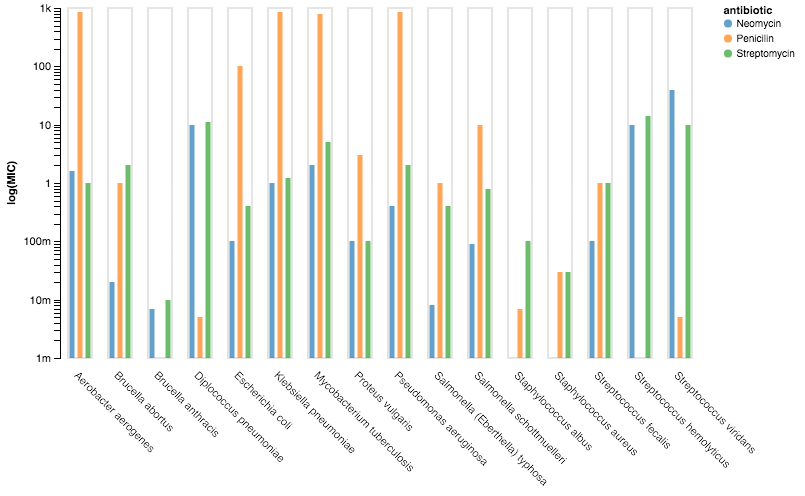

In [7]:
from altair import *
 
Chart(data2).mark_bar().encode(
    x=X('antibiotic:N',
        scale=Scale(bandSize=6.0),
        axis=False
    ),
    y=Y('MIC:Q',
        axis=Axis(title='log(MIC)', grid=False),
        scale=Scale(type='log')
    ),
    color=Color('antibiotic:N'),
    column=Column('Bacteria:N', title='', 
                  axis=Axis(orient='bottom', labelAngle=45, labelAlign='top')
    ),
)

## 6. Split the data by 'Gram Staining'
* add filter: filter=(expr.df.Gram_Staining == 'negative')
* same for 'positive'

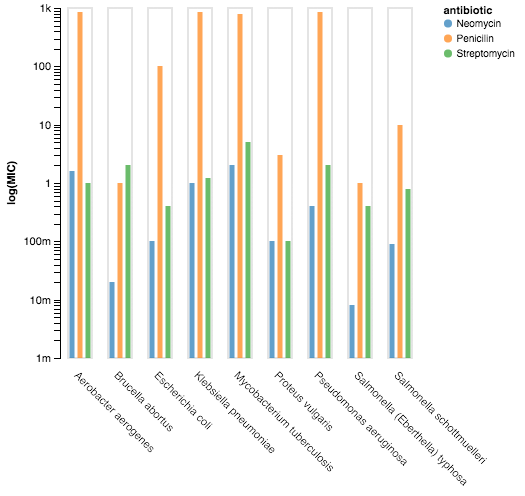

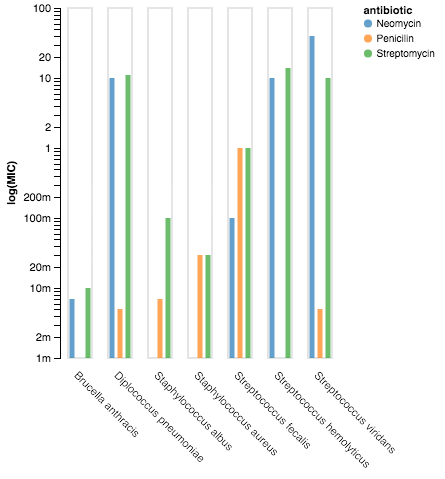

In [8]:
from altair import *
 
Chart(data2).mark_bar().encode(
    x=X('antibiotic:N',
        scale=Scale(bandSize=6.0),
        axis=False
    ),
    y=Y('MIC:Q',
        axis=Axis(title='log(MIC)', grid=False),
        scale=Scale(type='log')
    ),
    color=Color('antibiotic:N'),
    column=Column('Bacteria:N', title='', 
                  axis=Axis(orient='bottom', labelAngle=45, labelAlign='top')
    ),
).transform_data(
    filter=(expr.df.Gram_Staining == 'negative')
).display()


Chart(data2).mark_bar().encode(
    x=X('antibiotic:N',
        scale=Scale(bandSize=6.0),
        axis=False
    ),
    y=Y('MIC:Q',
        axis=Axis(title='log(MIC)', grid=False),
        scale=Scale(type='log')
    ),
    color=Color('antibiotic:N'),
    column=Column('Bacteria:N', title='', 
                  axis=Axis(orient='bottom', labelAngle=45, labelAlign='top')
    ),
).transform_data(
    filter=(expr.df.Gram_Staining == 'positive')
).display()
